# Import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Load Dataset


In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Describe Dataset Features

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Histogram of features

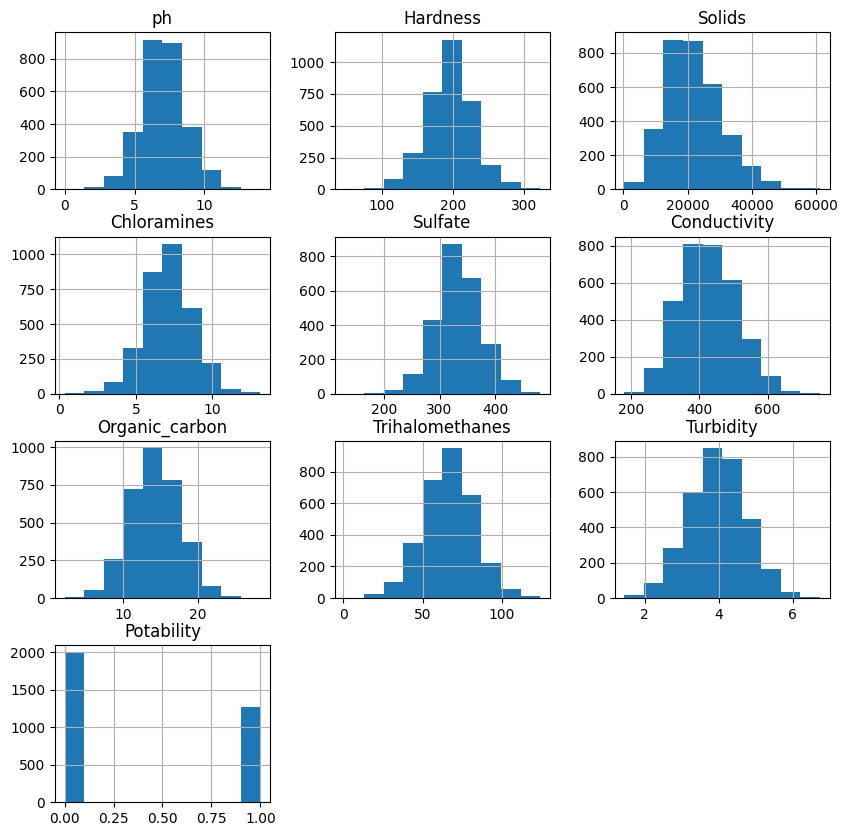

In [4]:
df.hist(figsize=(10,10))
plt.show()

# Bar Plot for Target

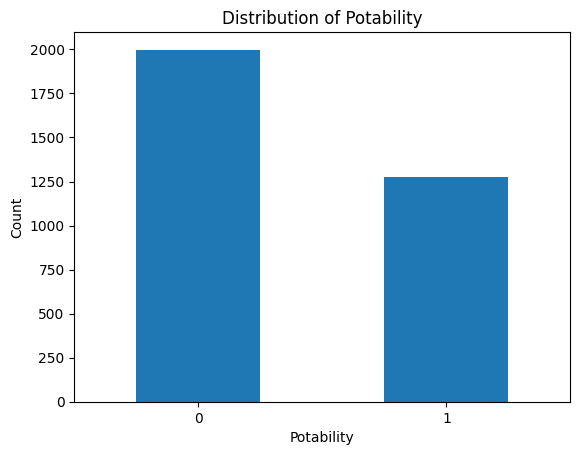

In [5]:
df['Potability'].value_counts().plot(kind='bar')
plt.title('Distribution of Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Nan Values

In [6]:
nan_counts = df.isnull().sum()
print("Number of NaN values per feature:")
print(nan_counts)

Number of NaN values per feature:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# Percentage of Potable and Non-Potable Water

In [7]:
potability_counts = df['Potability'].value_counts()
potability_percentages = potability_counts / len(df) * 100

print("\nPercentage of Potable and Non-Potable Water:")
print(potability_percentages)


Percentage of Potable and Non-Potable Water:
Potability
0    60.989011
1    39.010989
Name: count, dtype: float64


# Data Quality

Υπάρχουν αρκετές ελλιπείς τιμές στα δεδομένα, συγκεκριμένα στις στήλες 'ph', 'Sulfate', και 'Trihalomethanes'.
Τα δεδομένα είναι μη ισορροπημένα, με μεγαλύτερο ποσοστό να αφορά μη πόσιμα δείγματα.

Βάσει της ύπαρξης ελλιπών τιμών και της ανισορροπίας μεταξύ των κλάσεων, η ποιότητα των δεδομένων δεν θεωρείται ικανοποιητική και  θα μπορούσε να βελτιωθεί.

# Analysis of Potability based on ΠΟΥ Recommended pH Levels

In [8]:
df_ph_low = df[df['ph'] < 6.5]
df_ph_medium = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]
df_ph_high = df[df['ph'] > 8.5]

potability_percentage_ph_low = df_ph_low['Potability'].value_counts(normalize=True) * 100
potability_percentage_ph_medium = df_ph_medium['Potability'].value_counts(normalize=True) * 100
potability_percentage_ph_high = df_ph_high['Potability'].value_counts(normalize=True) * 100

print("Percentage of Potable and Non-Potable Water for pH < 6.5:")
print(potability_percentage_ph_low)

print("\nPercentage of Potable and Non-Potable Water for 6.5 <= pH <= 8.5:")
print(potability_percentage_ph_medium)

print("\nPercentage of Potable and Non-Potable Water for pH > 8.5:")
print(potability_percentage_ph_high)

Percentage of Potable and Non-Potable Water for pH < 6.5:
Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64

Percentage of Potable and Non-Potable Water for 6.5 <= pH <= 8.5:
Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64

Percentage of Potable and Non-Potable Water for pH > 8.5:
Potability
0    66.871166
1    33.128834
Name: proportion, dtype: float64


# Data Alignment with ΠΟΥ pH Guidelines

Βάσει της παραπάνω ανάλυσης, επιβεβαιώνεται σε μεγάλο βαθμό η καταλληλότητα του πόσιμου νερού στο προτεινόμενο εύρος pH σύμφωνα με τις οδηγίες του ΠΟΥ, καθώς το υψηλότερο ποσοστό πόσιμου νερού εντοπίζεται εντός αυτού του εύρους. Ωστόσο, είναι σημαντικό να σημειωθεί ότι η ποσιμότητα του νερού καθορίζεται από πολλούς παράγοντες, και το pH αποτελεί μόνο έναν από αυτούς.

# Scatter Plot of pH vs. Chloramines colored by Potability

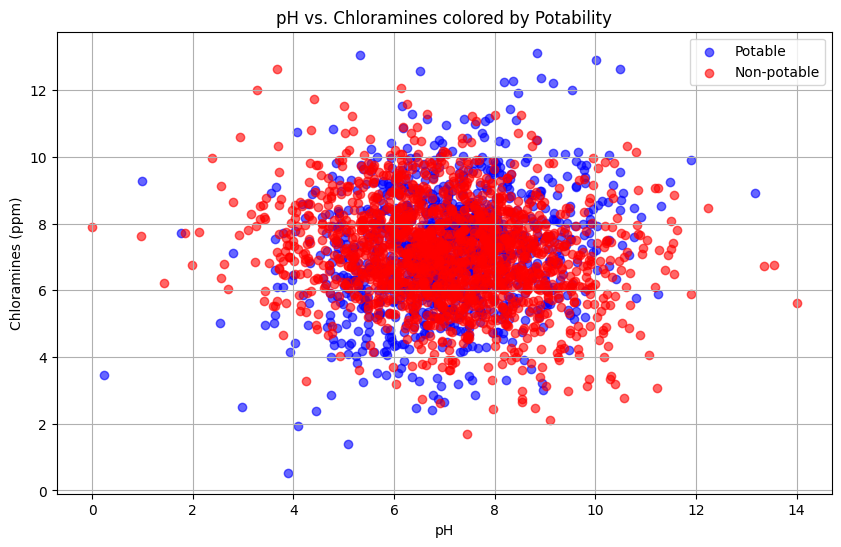

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Potability'] == 1]['ph'], df[df['Potability'] == 1]['Chloramines'], color='blue', label='Potable', alpha=0.6)
plt.scatter(df[df['Potability'] == 0]['ph'], df[df['Potability'] == 0]['Chloramines'], color='red', label='Non-potable', alpha=0.6)
plt.xlabel('pH')
plt.ylabel('Chloramines (ppm)')
plt.title('pH vs. Chloramines colored by Potability')
plt.legend()
plt.grid(True)
plt.show()

# Separability based on pH and Chloramines

Παρατηρώντας το διάγραμμα διασποράς, φαίνεται να υπάρχει σημαντική επικάλυψη μεταξύ των πόσιμων (μπλε) και μη πόσιμων (κόκκινων) σημείων δεδομένων με βάση τα επίπεδα pH και χλωραμινών. Αυτό υποδηλώνει ότι τα δύο αυτά χαρακτηριστικά από μόνα τους ενδέχεται να μην επαρκούν για τον σαφή διαχωρισμό των δύο κατηγοριών. Παρατειρήται μια μικρή οριοθέτηση μονο για επίπεδα της χλωραμίνης κατω απο 4mm και για μικρό pH, χωρίς πάλι αυτο να σημαίνει οτι τα δεδομένα διαχωρίζονται βαση αυτών των δύο χαρακτηριστικών.

# Fill Missing Values

In [10]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

print("Number of NaN values after filling:")
print(df.isnull().sum())

Number of NaN values after filling:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Convert Dataframe to Numpy arrays

In [11]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

# Split Dataset to Train-Test

In [12]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print("Train Samples:", x_train.shape[0])
print("Test Samples", x_test.shape[0])

Train Samples: 2293
Test Samples 983


# Create and Train Decision Tree Classifier




In [13]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

# Predictions on Train and Test Set

In [14]:
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

# Accuracy on Train and Test Set

In [15]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on Training Set: {train_accuracy:.4f}")
print(f"Accuracy on Test Set: {test_accuracy:.4f}")

Accuracy on Training Set: 1.0000
Accuracy on Test Set: 0.5748


# Define Hyperparameter Combinations and Evaluate Models

In [16]:
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 3, 5]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt']
ccp_alpha_values = [0.0, 0.01]

results = []

for criterion in criterion_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                for max_features in max_features_values:
                    for ccp_alpha in ccp_alpha_values:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            ccp_alpha=ccp_alpha,
                            random_state=0
                        )
                        dt_classifier.fit(x_train, y_train)

                        y_train_pred = dt_classifier.predict(x_train)
                        y_test_pred = dt_classifier.predict(x_test)

                        train_accuracy = accuracy_score(y_train, y_train_pred)
                        test_accuracy = accuracy_score(y_test, y_test_pred)

                        results.append({
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'ccp_alpha': ccp_alpha,
                            'train_accuracy': train_accuracy,
                            'test_accuracy': test_accuracy
                        })

results_df = pd.DataFrame(results)
print("\nResults Table:")
display(results_df)


Results Table:


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
0,gini,NaN,2,1,None,0.00,1.000000,0.574771
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.622584
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951592,0.581892
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.620148,0.626653
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
93,entropy,5.0,5,2,None,0.01,0.620148,0.626653
94,entropy,5.0,5,2,sqrt,0.00,0.642826,0.620549


# Select Best Hyperparameters with max_depth=3

In [17]:
filtered_results = results_df[results_df['max_depth'] == 3]
best_params_row = filtered_results.loc[filtered_results['test_accuracy'].idxmax()]

best_criterion = best_params_row['criterion']
best_max_depth = int(best_params_row['max_depth'])
best_min_samples_split = int(best_params_row['min_samples_split'])
best_min_samples_leaf = int(best_params_row['min_samples_leaf'])
best_max_features = best_params_row['max_features']
best_ccp_alpha = best_params_row['ccp_alpha']

print("Best Hyperparameters with max_depth = 3:")
print(f"Criterion: {best_criterion}")
print(f"Max Depth: {best_max_depth}")
print(f"Min Samples Split: {best_min_samples_split}")
print(f"Min Samples Leaf: {best_min_samples_leaf}")
print(f"Max Features: {best_max_features}")
print(f"CCP Alpha: {best_ccp_alpha}")
print(f"Test Accuracy: {best_params_row['test_accuracy']:.4f}")

Best Hyperparameters with max_depth = 3:
Criterion: entropy
Max Depth: 3
Min Samples Split: 2
Min Samples Leaf: 1
Max Features: None
CCP Alpha: 0.0
Test Accuracy: 0.6399


# Train Decision Tree with Best Hyperparameters (max_depth=3)

In [18]:
dt_classifier_best = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_features=best_max_features,
    ccp_alpha=best_ccp_alpha,
    random_state=0
)
dt_classifier_best.fit(x_train, y_train)

print("Decision Tree Classifier trained with best hyperparameters (max_depth=3).")

Decision Tree Classifier trained with best hyperparameters (max_depth=3).


# Visualize the Decision Tree

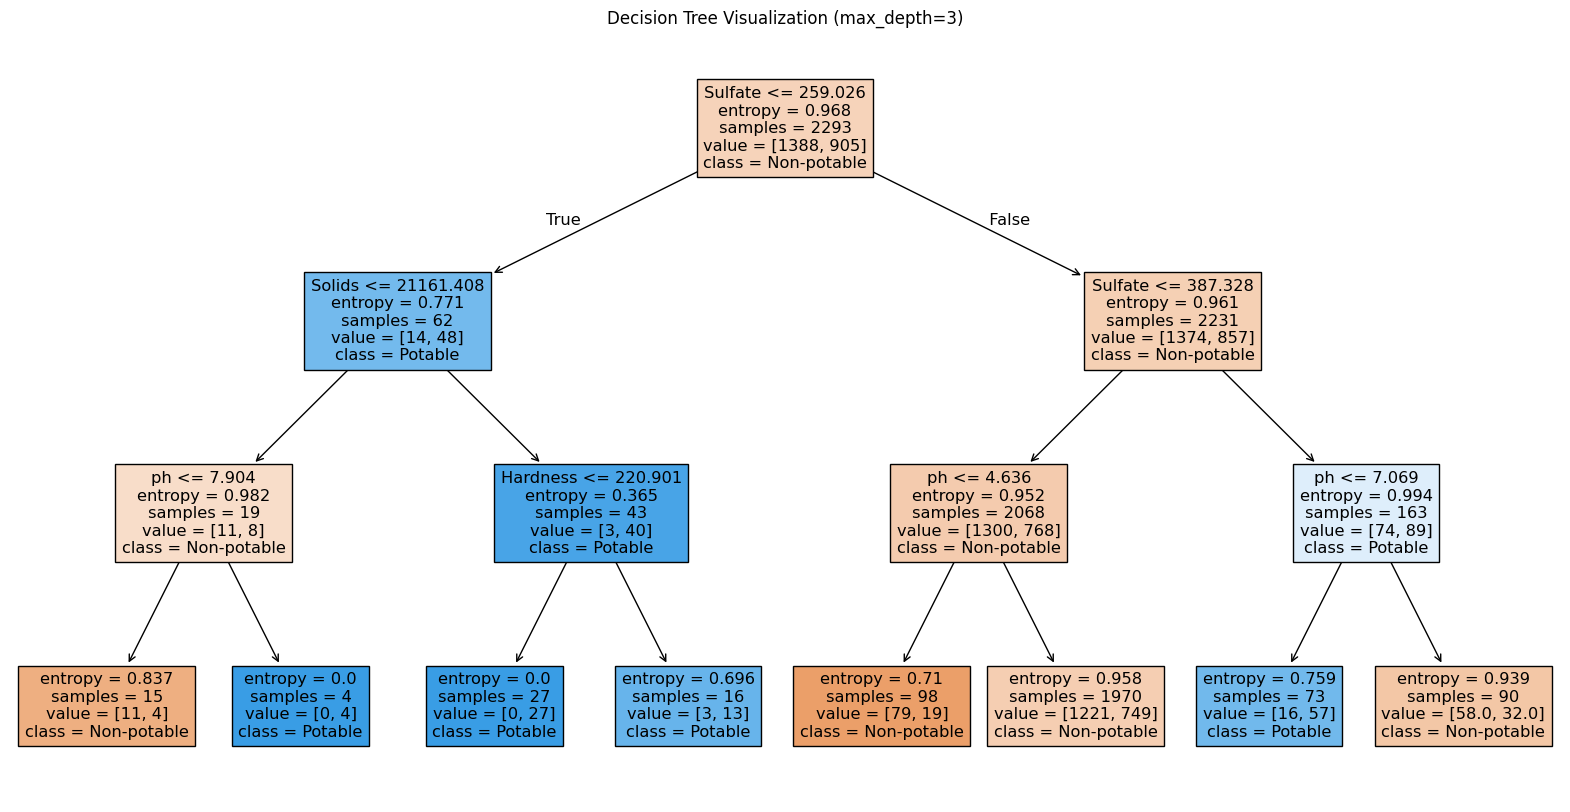

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_best, feature_names=input_df.columns.tolist(), filled=True, class_names=['Non-potable', 'Potable'])
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# Interpretation of Decision Tree Rules

Το δέντρο αποφάσεων ξεκινά από την ρίζα, όπου το πρώτο κριτήριο διαχωρισμού βασίζεται στη μεταβλητή Sulfate (≤ 259.026). Τα δείγματα με χαμηλότερη συγκέντρωση Sulfate ταξινομούνται κυρίως ως πόσιμα, ενώ εκείνα με υψηλότερες τιμές τείνουν να ταξινομούνται ως μη πόσιμα.

Στο αριστερό υποδέντρο(≤ 21161.408), οι επιπλέον διαχωρισμοί πραγματοποιούνται με βάση το pH και τη σκληρότητα (Hardness). Για παράδειγμα, κόμβοι με pH ≤ 7.904 ταξινομούνται ως πόσιμα και ως μη, ενώ δείγματα με πολύ χαμηλό Hardness ≤ 220.901  ταξινομούνται κυρίως ως πόσιμα.

Στο δεξί υποδέντρο (Sulfate <= 387.328), οι επιπλέον διαχωρισμοί πραγματοποιούνται με βάση το pH. Για παράδειγμα, κόμβοι με pH ≤ 7.069 παρουσιάζουν μεγαλύτερο ποσοστό πόσιμων δειγμάτων, ενώ δείγματα με πολύ χαμηλό pH (π.χ. ≤ 4.636) ταξινομούνται κυρίως ως μη πόσιμα.


# Select Overall Best Hyperparameters

In [20]:
best_overall_params_row = results_df.loc[results_df['test_accuracy'].idxmax()]

best_overall_criterion = best_overall_params_row['criterion']
best_overall_max_depth = int(best_overall_params_row['max_depth'])
best_overall_min_samples_split = int(best_overall_params_row['min_samples_split'])
best_overall_min_samples_leaf = int(best_overall_params_row['min_samples_leaf'])
best_overall_max_features = best_overall_params_row['max_features']
best_overall_ccp_alpha = best_overall_params_row['ccp_alpha']

print("Overall Best Hyperparameters:")
print(f"Criterion: {best_overall_criterion}")
print(f"Max Depth: {best_overall_max_depth}")
print(f"Min Samples Split: {best_overall_min_samples_split}")
print(f"Min Samples Leaf: {best_overall_min_samples_leaf}")
print(f"Max Features: {best_overall_max_features}")
print(f"CCP Alpha: {best_overall_ccp_alpha}")
print(f"Test Accuracy: {best_overall_params_row['test_accuracy']:.4f}")

Overall Best Hyperparameters:
Criterion: entropy
Max Depth: 5
Min Samples Split: 2
Min Samples Leaf: 2
Max Features: None
CCP Alpha: 0.0
Test Accuracy: 0.6551


# Train Decision Tree with Overall Best Hyperparameters

In [21]:
dt_classifier_overall_best = DecisionTreeClassifier(
    criterion=best_overall_criterion,
    max_depth=best_overall_max_depth,
    min_samples_split=best_overall_min_samples_split,
    min_samples_leaf=best_overall_min_samples_leaf,
    max_features=best_overall_max_features,
    ccp_alpha=best_overall_ccp_alpha,
    random_state=0
)
dt_classifier_overall_best.fit(x_train, y_train)

print("Decision Tree Classifier trained with overall best hyperparameters.")

Decision Tree Classifier trained with overall best hyperparameters.


# Calculate and Visualize Feature Importance

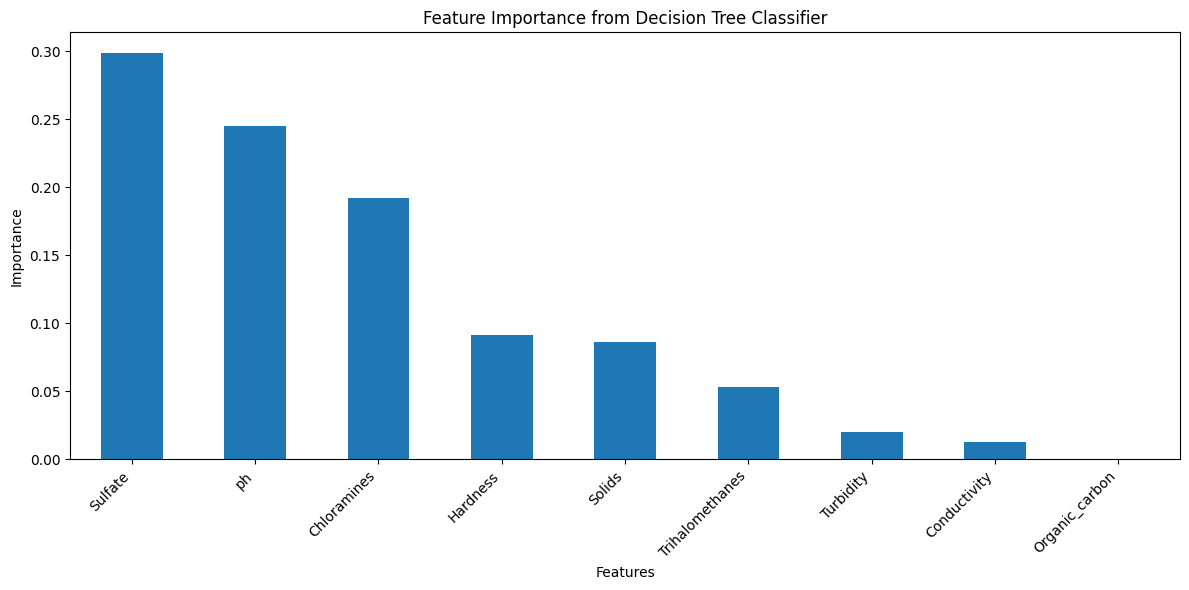


Feature Importances:
Sulfate            0.298956
ph                 0.244768
Chloramines        0.191956
Hardness           0.091392
Solids             0.086400
Trihalomethanes    0.053536
Turbidity          0.020127
Conductivity       0.012864
Organic_carbon     0.000000
dtype: float64


In [ ]:
feature_importances = dt_classifier_overall_best.feature_importances_
features = input_df.columns

feature_importance_series = pd.Series(feature_importances, index=features)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importance from Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

print("\nFeature Importances:")
print(sorted_feature_importances)

# Identify and Justify Top 5 Features

In [23]:
print("\nTop 5 Most Important Features:")
top_5_features = sorted_feature_importances.head(5)
print(top_5_features)


Top 5 Most Important Features:
Sulfate        0.298956
ph             0.244768
Chloramines    0.191956
Hardness       0.091392
Solids         0.086400
dtype: float64


Όπως προκύπτει από τα παραπάνω, τα χαρακτηριστικά Sulfate, pH, Chloramines, Hardness και Solids διαθέτουν τη μεγαλύτερη βαρύτητα στις αποφάσεις του μοντέλου, γεγονός που υποδηλώνει ότι χρησιμοποιούνται συχνότερα και με μεγαλύτερη αποτελεσματικότητα για τη διάκριση μεταξύ πόσιμου και μη πόσιμου νερού.
Η αυξημένη σημαντικότητα αυτών των χαρακτηριστικών δείχνει ότι επηρεάζουν ουσιαστικά τη διαδικασία λήψης αποφάσεων του μοντέλου, καθορίζοντας την τελική ταξινόμηση.
Συνεπώς, σε ένα πρακτικό πλαίσιο όπου μια συσκευή μέτρησης μπορεί να πραγματοποιεί περιορισμένο αριθμό (έως πέντε) χημικών αναλύσεων, η εστίαση στα συγκεκριμένα χαρακτηριστικά θα ήταν η πλέον ενδεδειγμένη επιλογή. Η μέτρηση αυτών των παραμέτρων θα παρείχε τις πιο αντιπροσωπευτικές πληροφορίες για την αξιόπιστη πρόβλεψη της ποσιμότητας του νερού, σύμφωνα με τους κανόνες που έχει μάθει το μοντέλο μέσω της διαδικασίας εκπαίδευσης.


# Random Forest vs Decision Tree

Ένα Τυχαίο Δάσος (Random Forest) ενδέχεται να πετύχει καλύτερη ακρίβεια από ένα μεμονωμένο Δέντρο Απόφασης (Decision Tree) για τους εξής λόγους:

Μείωση της Υπερπροσαρμογής (Overfitting): Ένα δέντρο απόφασης, ειδικά αν είναι βαθύ, μπορεί να υπερπροσαρμοστεί στα δεδομένα εκπαίδευσης, μαθαίνοντας το noise και τις ιδιαιτερότητες του συγκεκριμένου συνόλου δεδομένων. Αντίθετα, ένα Τυχαίο Δάσος αποτελείται από πολλά δέντρα απόφασης, εκπαιδευμένα σε διαφορετικά υποσύνολα των δεδομένων και των χαρακτηριστικών. Η τελική πρόβλεψη προκύπτει από το voiting των επιμέρους δέντρων. Αυτή η ομαδοποίηση (ensemble method) μειώνει την επίδραση της υπερπροσαρμογής που μπορεί να εμφανίσει ένα μεμονωμένο δέντρο.

Ενίσχυση της Ανθεκτικότητας: Επειδή το Τυχαίο Δάσος συνδυάζει τα αποτελέσματα πολλών δέντρων, είναι πιο ανθεκτικό σε outliers και noise στα δεδομένα σε σύγκριση με ένα μεμονωμένο δέντρο.

Συνοπτικά, ενώ ένα δέντρο απόφασης μπορεί να είναι επιρρεπές σε υπερπροσαρμογή ευαίσθητο στα outliers, το Τυχαίο Δάσος, ως σύνολο πολλών δέντρων, αξιοποιεί τη δύναμη της ομαδοποίησης για να δημιουργήσει ένα πιο σταθερό, ανθεκτικό και γενικεύσιμο μοντέλο, το οποίο συχνά οδηγεί σε καλύτερη ακρίβεια στα ανεξάρτητα test data.

# Create and Train Random Forest Classifier with Hyperparameter Tuning

In [24]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_values = [50, 100, 200]
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 3, 5]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt']
ccp_alpha_values = [0.0, 0.01]

rf_results = []

for n_estimators in n_estimators_values:
    for criterion in criterion_values:
        for max_depth in max_depth_values:
            for min_samples_split in min_samples_split_values:
                for min_samples_leaf in min_samples_leaf_values:
                    for max_features in max_features_values:
                        for ccp_alpha in ccp_alpha_values:
                            rf_classifier = RandomForestClassifier(
                                n_estimators=n_estimators,
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                ccp_alpha=ccp_alpha,
                                random_state=seed,
                                n_jobs=-1
                            )
                            rf_classifier.fit(x_train, y_train)

                            y_train_pred_rf = rf_classifier.predict(x_train)
                            y_test_pred_rf = rf_classifier.predict(x_test)

                            train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
                            test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

                            rf_results.append({
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'ccp_alpha': ccp_alpha,
                                'train_accuracy': train_accuracy_rf,
                                'test_accuracy': test_accuracy_rf
                            })

rf_results_df = pd.DataFrame(rf_results)

print("\nRandom Forest Results Table:")
display(rf_results_df)


Random Forest Results Table:


,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
0,50,gini,NaN,2,1,None,0.00,1.000000,0.672431
1,50,gini,NaN,2,1,None,0.01,0.619712,0.626653
2,50,gini,NaN,2,1,sqrt,0.00,1.000000,0.693795
3,50,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,50,gini,NaN,2,2,None,0.00,0.997819,0.669379
...,...,...,...,...,...,...,...,...,...
283,200,entropy,5.0,5,1,sqrt,0.01,0.624509,0.628688
284,200,entropy,5.0,5,2,None,0.00,0.695159,0.660224
285,200,entropy,5.0,5,2,None,0.01,0.646751,0.646999
286,200,entropy,5.0,5,2,sqrt,0.00,0.682948,0.648016


# False Positive vs False Negative

Σε ένα μοντέλο που προβλέπει την ποσιμότητα του νερού, είναι πιο σημαντικό να προβλέπει καλά το μη-πόσιμο νερό, ακόμα κι αν χάνει λίγη ακρίβεια στην πρόβλεψη του πόσιμου νερού.

**False Positives (Ψευδώς Θετικά):** Αυτό συμβαίνει όταν το μοντέλο προβλέπει ότι το νερό είναι πόσιμο (Θετικό), αλλά στην πραγματικότητα δεν είναι (Μη-πόσιμο). Σε αυτή την περίπτωση, ένα άτομο μπορεί να πιει νερό που είναι ακατάλληλο, με δυνητικά σοβαρές συνέπειες για την υγεία του.

**False Negatives (Ψευδώς Αρνητικά):** Αυτό συμβαίνει όταν το μοντέλο προβλέπει ότι το νερό δεν είναι πόσιμο (Αρνητικό), αλλά στην πραγματικότητα είναι (Πόσιμο). Σε αυτή την περίπτωση, ένα άτομο θα αποφύγει να πιει νερό που είναι στην πραγματικότητα ασφαλές. Αν και αυτό μπορεί να οδηγήσει σε σπατάλη πόρων (νερό που θα μπορούσε να χρησιμοποιηθεί δεν χρησιμοποιείται) , δεν εγκυμονεί άμεσο κίνδυνο για την υγεία.

Αρα, το κόστος ενός False Positive (πρόβλεψη πόσιμου νερού ενώ δεν είναι) είναι πολύ μεγαλύτερο από το κόστος ενός False Negative (πρόβλεψη μη-πόσιμου νερού ενώ είναι πόσιμο). Γι' αυτό, σε εφαρμογές όπως αυτή, προτιμάται ένα μοντέλο που είναι πιο "συντηρητικό" και τείνει να ταξινομεί το νερό ως μη-πόσιμο ακόμα και με μια μικρή αμφιβολία, προκειμένου να ελαχιστοποιηθούν οι πιθανότητες κατανάλωσης μολυσμένου νερού.

# Interpretability

Από νομικής άποψης, η επιλογή μεταξύ του καλύτερου Δέντρου Απόφασης και του καλύτερου Τυχαίου Δάσους για την πρόβλεψη της ποσιμότητας του νερού εξαρτάται σε μεγάλο βαθμό απο  ερμηνευσιμότητα (interpretability) του μοντέλου.


Δέντρο Απόφασης: Ένα Δέντρο Απόφασης είναι πολύ πιο ερμηνεύσιμο. Οι κανόνες που οδηγούν σε μια πρόβλεψη είναι σαφείς και μπορούν εύκολα να αναπαραχθούν και να εξηγηθούν. Αυτή η διαφάνεια είναι ένα σημαντικό πλεονέκτημα σε νομικές περιπτώσεις, καθώς επιτρέπει στην εταιρεία να δικαιολογήσει την απόφαση που έλαβε το μοντέλο

Τυχαίο Δάσος: Ένα Τυχαίο Δάσος, αν και συνήθως επιτυγχάνει υψηλότερη ακρίβεια  είναι ένας αλγόριθμος black box σε σύγκριση με το Δέντρο Απόφασης. Αποτελείται από πολλά δέντρα, και η τελική πρόβλεψη είναι ένας συνδυασμός των προβλέψεων όλων των δέντρων. Είναι πολύ δύσκολο να εξηγηθεί με σαφήνεια ο λόγος για τον οποίο ένα συγκεκριμένο δείγμα ταξινομήθηκε με έναν συγκεκριμένο τρόπο από το συνολικό δάσος.

 Σε περίπτωση νομικής διαμάχης ή ελέγχου, η εταιρεία θα πρέπει να είναι σε θέση να εξηγήσει πώς το μοντέλο κατέληξε στην απόφασή του. Ένα Δέντρο Απόφασης, με τους διαφανείς κανόνες του, παρέχει αυτή τη δυνατότητα. Αντίθετα, η έλλειψη ερμηνευσιμότητας ενός Τυχαίου Δάσους μπορεί να καταστήσει δύσκολη τη δικαιολόγηση των αποφάσεων του μοντέλου και να εκθέσει την εταιρεία σε νομικούς κινδύνους.

 Επομένως νομικά ασφαλέστερο για τη εταιρία ειναι η χρήση του καλύτερου δεντρου.